In [154]:
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.patches import Circle, Patch
import matplotlib.image as mpimg

In [8]:
url = "https://understat.com/player/843"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
script_tag = soup.find('script', string=lambda x: x and 'var shotsData' in x)

javascript_content = script_tag.text if script_tag else ""

# Extract data from shotsData
start_index = javascript_content.find("JSON.parse('") + len("JSON.parse('")
end_index = javascript_content.find("')")

# Unescape Unicode and decode the JavaScript string
escaped_json = javascript_content[start_index:end_index]
unescaped_json = bytes(escaped_json, 'utf-8').decode('unicode_escape')

# Parse the JSON data
shots_data = json.loads(unescaped_json)

# Now, shots_data contains the data in var shotsData
print(shots_data)

[{'id': '14494', 'minute': '39', 'result': 'SavedShot', 'X': '0.7390000152587891', 'Y': '0.6079999923706054', 'xG': '0.019021300598978996', 'player': 'James Ward-Prowse', 'h_a': 'a', 'player_id': '843', 'situation': 'OpenPlay', 'season': '2014', 'shotType': 'RightFoot', 'match_id': '4756', 'h_team': 'Liverpool', 'a_team': 'Southampton', 'h_goals': '2', 'a_goals': '1', 'date': '2014-08-17 13:30:00', 'player_assisted': 'José Fonte', 'lastAction': 'Pass'}, {'id': '14502', 'minute': '66', 'result': 'BlockedShot', 'X': '0.730999984741211', 'Y': '0.629000015258789', 'xG': '0.015140400268137455', 'player': 'James Ward-Prowse', 'h_a': 'a', 'player_id': '843', 'situation': 'OpenPlay', 'season': '2014', 'shotType': 'RightFoot', 'match_id': '4756', 'h_team': 'Liverpool', 'a_team': 'Southampton', 'h_goals': '2', 'a_goals': '1', 'date': '2014-08-17 13:30:00', 'player_assisted': 'José Fonte', 'lastAction': 'BallRecovery'}, {'id': '14507', 'minute': '85', 'result': 'SavedShot', 'X': '0.89199996948242

In [26]:
df_jwp_shots = pd.DataFrame(shots_data)

# Summary stats 
# Checking X and Y coordinates are between 0 and 1
df_jwp_shots.loc[:,["X", "Y"]].astype(float).describe()

,X,Y
count,382.000000,382.000000
mean,0.799026,0.519416
std,0.089054,0.130092
min,0.063000,0.249000
25%,0.744250,0.429500
50%,0.790500,0.500500
75%,0.862000,0.590000
max,0.977000,0.930000


In [31]:
from PIL import Image

# Specify the desired width and height for the scaled images
desired_width = 100
desired_height = 100

# Load and resize the images
image_paths = ['Liverpool.png', 'everton.png', 'tottenham_hotspur.png', 'chelsea_fc.png', 'Fulham.png', 
               'Brighton__Hove_Albion.png']  # Replace with the paths to your .png files
for image_path in image_paths:
    image = Image.open(f'../images/{image_path}')
    resized_image = image.resize((desired_width, desired_height), Image.LANCZOS)  # Use LANCZOS for anti-aliasing
    resized_image.save(f"../images/resized_{image_path}", optimize=True, quality=95)  # Save the resized image with a new name

print("Images resized successfully.")

Images resized successfully.


Images resized successfully.


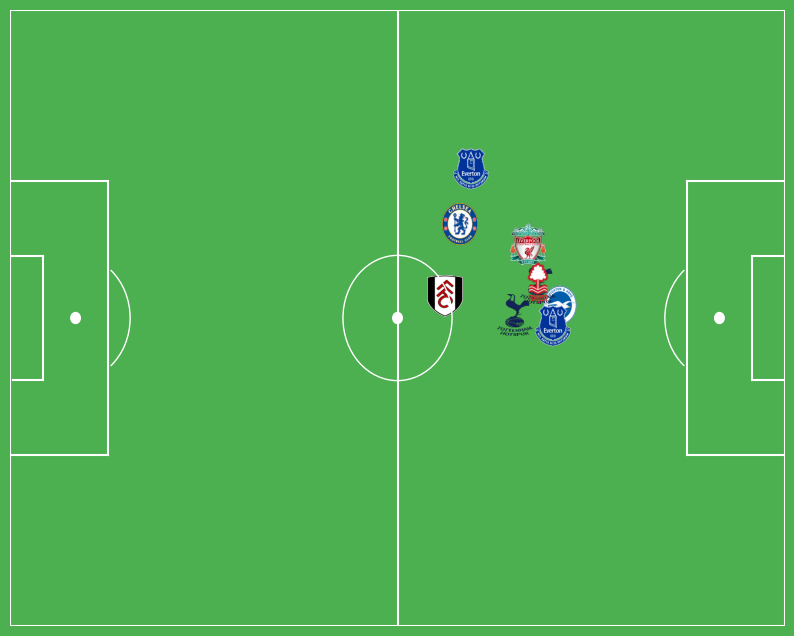

In [191]:
# Define pitch dimensions
pitch_length = 130.0
pitch_width = 90.0

#Create figure
fig=plt.figure()
fig.set_size_inches(10, 8)
fig.set_facecolor('#4CAF50')
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="white")
plt.plot([0,130],[90,90], color="white")
plt.plot([130,130],[90,0], color="white")
plt.plot([130,0],[0,0], color="white")
plt.plot([65,65],[0,90], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="white")
plt.plot([0,16.5],[65,65],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="white")
plt.plot([113.5,113.5],[65,25],color="white")
plt.plot([113.5,130],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="white")
plt.plot([5.5,5.5],[54,36],color="white")
plt.plot([5.5,0.5],[36,36],color="white")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="white")
plt.plot([124.5,124.5],[54,36],color="white")
plt.plot([124.5,130],[36,36],color="white")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="white",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="white")
leftPenSpot = plt.Circle((11,45),0.8,color="white")
rightPenSpot = plt.Circle((119,45),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')


# Goals scored
df_jwp_goals = df_jwp_shots[df_jwp_shots["result"] == "Goal"]
df_jwp_goals_2223 = df_jwp_goals.query("season == '2022'").reset_index()

# Setting team colours
team_colors = {
    'Liverpool': 'Red',
    'Nottingham Forest': 'Red',
    'Tottenham': 'White',
    'Chelsea': 'Blue',
    'Everton': 'Blue',
    'Fulham': 'White',
    'Brighton': 'Light_blue'
}

from PIL import Image

# Specify the desired width and height for the scaled images
desired_width = 100
desired_height = 100

# Load and resize the images
image_paths = ['Liverpool.png', 'Everton.png', 'Tottenham.png', 'Chelsea.png', 'Fulham.png', 
               'Brighton.png', 'Nottingham Forest.png']  # Replace with the paths to your .png files
for image_path in image_paths:
    image = Image.open(f'../images/{image_path}')
    resized_image = image.resize((desired_width, desired_height), Image.LANCZOS)  # Use LANCZOS for anti-aliasing
    resized_image.save(f"../images/resized_{image_path}", optimize=True, quality=95)  # Save the resized image with a new name

print("Images resized successfully.")


# Plot Parameters
X = df_jwp_goals_2223['X'].astype(float) * 100
Y = df_jwp_goals_2223['Y'].astype(float) * 100
team_names =  pd.Series(np.where(df_jwp_goals_2223["h_team"] == "Southampton", 
                                 df_jwp_goals_2223["a_team"], 
                                 df_jwp_goals_2223["h_team"]), 
                                 name="team_names")
oppo_colour = team_names.map(team_colors)

# Load the team badge image
team_badges = [mpimg.imread(f'../images/resized_{team}.png') for team in team_names]

# Display the image on the pitch at its respective position
image_size = 3  # Adjust the size of the displayed images

for goal, unused in enumerate(df_jwp_goals_2223["result"]):
    
    badge = mpimg.imread(f'../images/resized_{team_names[goal]}.png')
    x = X[goal]
    y = Y[goal]

    ax.imshow(badge, extent=[x - image_size, x + image_size, y - image_size, y + image_size], alpha=1.0, aspect='auto')

    # Set x-axis and y-axis limits for the specific axes
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 90)


# Save the figure
plt.savefig('../images/jwp_goal_map_2223.png')